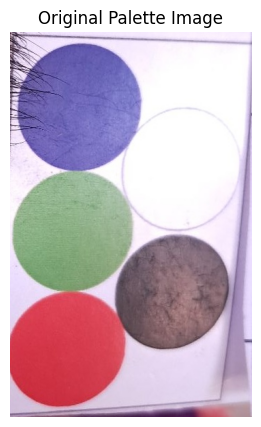

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your cropped palette image (make sure "palette.jpg" is in your working directory)
palette_img = cv2.imread("../Produced Images/Eye Palette Yolo Cropped/1709885965388.jpg")
if palette_img is None:
    raise IOError("Error loading image. Please check the file path.")
    
# Display the loaded image (convert BGR to RGB for proper display with matplotlib)
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette Image")
plt.axis("off")
plt.show()


In [34]:
# Convert the image to grayscale and apply a median blur to reduce noise
gray = cv2.cvtColor(palette_img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.medianBlur(gray, 5)

# Use HoughCircles to detect circles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=60,
    maxRadius=90
)

if circles is not None:
    # Round the circle parameters and convert to unsigned 16-bit integers
    circles = np.uint16(np.around(circles[0]))
    print("Detected circles (x, y, radius):")
    print(circles)
else:
    raise ValueError("No circles detected!")



Detected circles (x, y, radius):
[[245 200  89]
 [242 389  88]
 [103 105  89]
 [ 91 296  88]
 [ 86 471  88]
 [256 362  60]
 [269 179  64]]


In [35]:
measured_colors = []  # To store the average color (B, G, R) for each circle

# Loop through each detected circle
for (x, y, r) in circles:
    # Create a binary mask where the circle is white and the rest is black
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color inside the circle using the mask
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))

print("Measured colors (B, G, R):")
for color in measured_colors:
    print(color)


Measured colors (B, G, R):
(253.33407124169855, 250.5631314147716, 251.8969209096398)
(121.51585571504957, 110.2935055320199, 135.71291078846707)
(183.5733950493057, 104.57737975447778, 112.18031797142282)
(136.874429317649, 175.6417143092173, 143.59568954880106)
(88.04282478896438, 69.8497014618077, 213.24418365246035)
(118.06023562760208, 107.92807157409868, 135.60120471255203)
(254.7796623356415, 254.60375009725357, 254.7564770870614)


Measured colors (B, G, R):
Circle 1: (253.33407124169855, 250.5631314147716, 251.8969209096398)
Circle 2: (121.51585571504957, 110.2935055320199, 135.71291078846707)
Circle 3: (183.5733950493057, 104.57737975447778, 112.18031797142282)
Circle 4: (136.874429317649, 175.6417143092173, 143.59568954880106)
Circle 5: (88.04282478896438, 69.8497014618077, 213.24418365246035)
Circle 6: (118.06023562760208, 107.92807157409868, 135.60120471255203)
Circle 7: (254.7796623356415, 254.60375009725357, 254.7564770870614)


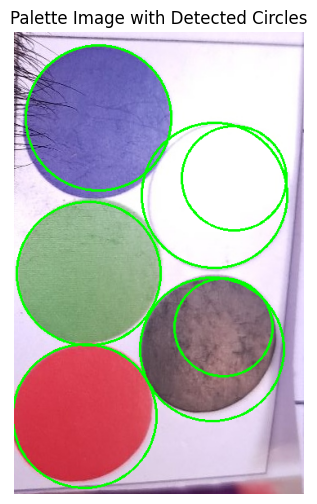

In [36]:
# Assume 'palette_img' is already loaded and 'gray' & 'circles' are computed in previous cells

# Create a copy of the palette image to draw circles on
palette_drawn = palette_img.copy()

measured_colors = []  # List to store the average color for each circle (B, G, R)

# Loop through each detected circle (x, y, radius)
for (x, y, r) in circles:
    # Create a binary mask for the current circle
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color within the circle
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))
    
    # Draw the circle outline on the copied palette image (green outline)
    cv2.circle(palette_drawn, (x, y), r, (0, 255, 0), 2)

# Print the measured colors
print("Measured colors (B, G, R):")
for idx, color in enumerate(measured_colors, start=1):
    print(f"Circle {idx}: {color}")

# Display the palette image with drawn circles using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(palette_drawn, cv2.COLOR_BGR2RGB))
plt.title("Palette Image with Detected Circles")
plt.axis("off")
plt.show()


Measured colors (B, G, R):
Circle 1: (110.77664583511685, 78.60294495334304, 71.66860713979968)
Circle 2: (249.48001027309306, 249.31649687526755, 245.90428901635136)
Circle 3: (153.47172156619018, 186.23936784160526, 116.18014738524373)
Circle 4: (203.5205033815598, 113.12875609964901, 99.39842479239792)
Circle 5: (110.05610711358048, 79.85736405865744, 236.67009745878497)


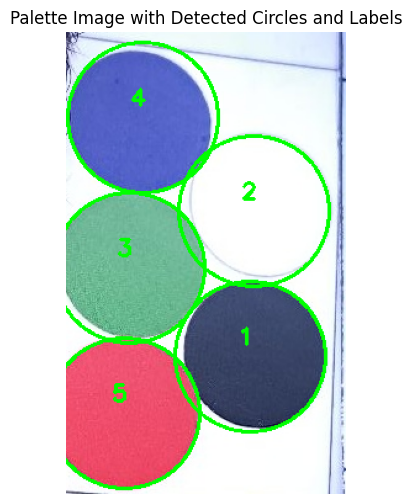

In [28]:
# Assume 'palette_img' is already loaded and 'gray' & 'circles' are computed in previous cells

# Create a copy of the palette image to draw circles and labels on
palette_drawn = palette_img.copy()

measured_colors = []  # List to store the average color for each circle (B, G, R)

# Loop through each detected circle (x, y, radius)
for idx, (x, y, r) in enumerate(circles, start=1):
    # Create a binary mask for the current circle
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color within the circle using the mask
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))
    
    # Draw the circle outline on the copied palette image (green outline)
    cv2.circle(palette_drawn, (x, y), r, (0, 255, 0), 2)
    
    # Add a label for the circle
    label = f"{idx}"
    # Place the label near the top-left of the circle's center with an offset
    cv2.putText(palette_drawn, label, (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Print the measured colors for each circle
print("Measured colors (B, G, R):")
for idx, color in enumerate(measured_colors, start=1):
    print(f"Circle {idx}: {color}")

# Display the palette image with drawn circles and labels using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(palette_drawn, cv2.COLOR_BGR2RGB))
plt.title("Palette Image with Detected Circles and Labels")
plt.axis("off")
plt.show()


In [6]:
# Define reference colors (in BGR order)
reference_colors = {
    "black": (0,   0,   0),
    "white": (255, 255, 255),
    "red":   (0,   0,   255),
    "green": (0,   255, 0),
    "blue":  (255, 0,   0)
}

# Match each measured color to the closest reference color.
matched_pairs = []  # Each pair is (measured_color, reference_color)
used_refs = set()

for mc in measured_colors:
    mc_arr = np.array(mc, dtype=np.float32)
    best_label = None
    best_dist = float("inf")
    
    for label, ref_color in reference_colors.items():
        if label in used_refs:
            continue  # Each reference color is used only once
        ref_arr = np.array(ref_color, dtype=np.float32)
        dist = np.linalg.norm(mc_arr - ref_arr)
        if dist < best_dist:
            best_dist = dist
            best_label = label
            best_ref = ref_color
            
    used_refs.add(best_label)
    matched_pairs.append((mc, best_ref))

print("Matched Measured Colors to Reference Colors:")
for meas, ref in matched_pairs:
    print("Measured:", meas, "-> Reference:", ref)


Matched Measured Colors to Reference Colors:
Measured: (187.8516229753464, 197.3201717296559, 248.97528133740974) -> Reference: (255, 255, 255)
Measured: (79.58352292312995, 37.79034815580834, 58.45604963805584) -> Reference: (0, 0, 0)
Measured: (61.35465074966247, 119.00085269665315, 120.60818588787038) -> Reference: (0, 0, 255)
Measured: (41.412705180132164, 32.863071129112484, 46.11689049953812) -> Reference: (255, 0, 0)
Measured: (55.428289329335186, 41.41205295107145, 223.46185913844803) -> Reference: (0, 255, 0)


In [7]:
# Create arrays from the matched pairs
meas_arr = np.array([pair[0] for pair in matched_pairs], dtype=np.float32)  # Shape: (N, 3)
ref_arr  = np.array([pair[1] for pair in matched_pairs], dtype=np.float32)  # Shape: (N, 3)

# Solve the linear equation meas_arr * M = ref_arr in a least squares sense
M, residuals, rank, s = np.linalg.lstsq(meas_arr, ref_arr, rcond=None)
print("Computed Color Correction Matrix (M):")
print(M)


Computed Color Correction Matrix (M):
[[ 1.7260964   0.31805235 -1.5476879 ]
 [ 0.00964046 -0.8943288   3.031345  ]
 [-0.3916091   1.2543769  -0.18456578]]


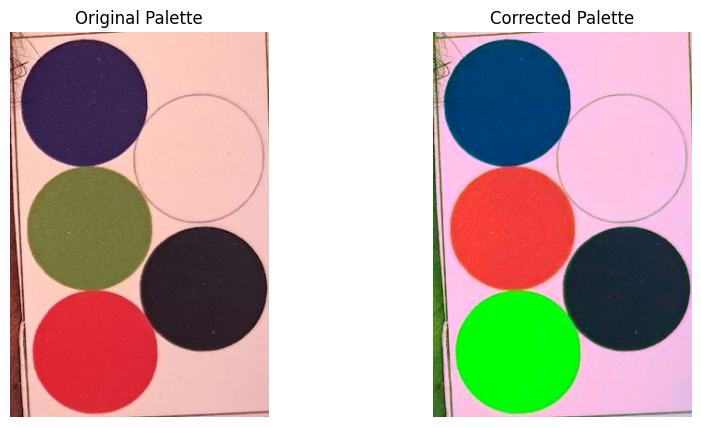

In [8]:
# Reshape the image to a 2D array of pixels (each pixel is a 3-element vector)
h, w, c = palette_img.shape
pixels = palette_img.reshape((-1, 3)).astype(np.float32)

# Apply the color correction matrix to each pixel
corrected_pixels = np.dot(pixels, M)

# Clamp pixel values to the valid range [0, 255]
corrected_pixels = np.clip(corrected_pixels, 0, 255)

# Reshape back to the original image dimensions and convert to uint8
corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)

# Display the corrected palette image alongside the original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Corrected Palette")
plt.axis("off")
plt.show()


In [9]:
import numpy as np

# Assume meas_arr and ref_arr are already defined as:
# meas_arr: (N, 3) array of measured colors (B, G, R)
# ref_arr:  (N, 3) array of reference colors (B, G, R)

# 1. Extend the measured color array with a column of ones to account for the offset.
ones = np.ones((meas_arr.shape[0], 1), dtype=np.float32)
meas_arr_extended = np.hstack([meas_arr, ones])  # Shape becomes (N, 4)

# 2. Solve for A in the equation:
#      meas_arr_extended * A = ref_arr
# where A will be a (4, 3) matrix.
A, residuals, rank, s = np.linalg.lstsq(meas_arr_extended, ref_arr, rcond=None)

# 3. To get a transform M that works as:
#      corrected_color = M @ [measured_color; 1]   (with [measured_color;1] as a (4,1) column vector)
# we need M to be of shape (3, 4). Since our least-squares solution gives:
#      meas_arr_extended (N, 4) * A (4, 3) = ref_arr (N, 3),
# then we can take the transpose of A:
M_affine = A.T  # This gives a (3, 4) matrix

print("Computed Color Correction Affine Matrix (3x4):")
print(M_affine)


Computed Color Correction Affine Matrix (3x4):
[[ 1.4940311e+00  9.0988003e-02 -5.1742625e-01  3.9216473e+01]
 [ 9.3152493e-01 -1.1093738e+00  1.5869790e+00 -1.0367010e+02]
 [-1.5420035e+00  3.0293524e+00 -1.8148395e-01 -9.6058762e-01]]


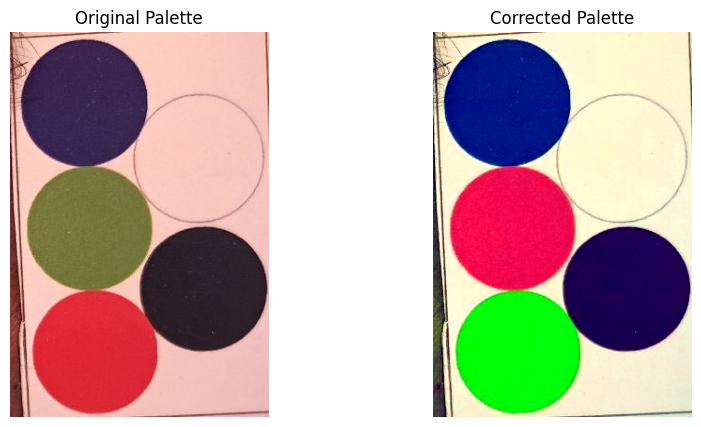

In [10]:
# Reshape the image to a 2D array of pixels (each pixel is a 3-element vector)
h, w, c = palette_img.shape
pixels = palette_img.reshape((-1, 3)).astype(np.float32)

# Extend the pixel array by appending a column of ones (for the offset)
ones = np.ones((pixels.shape[0], 1), dtype=np.float32)
pixels_extended = np.hstack([pixels, ones])  # Now shape is (N, 4)

# Apply the affine color correction transform:
# Each pixel is corrected by: corrected_pixel = M_affine @ [pixel; 1]
# Since M_affine has shape (3, 4), we need to transpose it to multiply with an (N, 4) array.
corrected_pixels = np.dot(pixels_extended, M_affine.T)

# Clamp pixel values to the valid range [0, 255]
corrected_pixels = np.clip(corrected_pixels, 0, 255)

# Reshape back to the original image dimensions and convert to uint8
corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)

# Display the original and corrected palette images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Corrected Palette")
plt.axis("off")
plt.show()


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_polynomial_transform(meas_arr, ref_arr):
    """
    Compute a second-order polynomial transformation.
    
    Parameters:
        meas_arr: (N, 3) array of measured colors [r, g, b]
        ref_arr:  (N, 3) array of reference colors [r, g, b]
    
    Returns:
        coeffs: (3, 10) array where each row contains the coefficients 
                for transforming one color channel.
    """
    # Split measured colors into r, g, b components.
    r = meas_arr[:, 0]
    g = meas_arr[:, 1]
    b = meas_arr[:, 2]
    ones = np.ones_like(r)
    
    # Build the design matrix with 10 columns: linear, quadratic, and cross terms.
    # Each row corresponds to a measured color sample.
    X = np.vstack([r, g, b, r**2, g**2, b**2, r*g, r*b, g*b, ones]).T  # Shape: (N, 10)
    
    # For each color channel (assumed order: r, g, b), solve for the coefficients.
    coeffs = []
    for i in range(3):
        y = ref_arr[:, i]  # Reference values for the current channel.
        # Solve X * c = y in a least squares sense.
        c, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
        coeffs.append(c)  # c is shape (10,)
    
    # Return as a (3, 10) coefficient matrix.
    coeffs = np.array(coeffs)
    return coeffs

def apply_polynomial_transform(image, coeffs):
    """
    Apply the second-order polynomial transformation to an image.
    
    Parameters:
        image: The input image in shape (h, w, 3), in float32.
        coeffs: (3, 10) matrix from compute_polynomial_transform.
    
    Returns:
        corrected_img: The color corrected image.
    """
    h, w, c = image.shape
    pixels = image.reshape((-1, 3)).astype(np.float32)
    
    # Split channels.
    r = pixels[:, 0]
    g = pixels[:, 1]
    b = pixels[:, 2]
    ones = np.ones_like(r)
    
    # Build the design matrix for all pixels.
    X = np.vstack([r, g, b, r**2, g**2, b**2, r*g, r*b, g*b, ones]).T  # Shape: (N, 10)
    
    # For each pixel, compute the transformed values.
    # The corrected pixel is given by: [r_corr, g_corr, b_corr] = X @ coeffs.T
    corrected = np.dot(X, coeffs.T)  # Shape: (N, 3)
    
    # Clamp the values and reshape back to image dimensions.
    corrected = np.clip(corrected, 0, 255)
    corrected_img = corrected.reshape((h, w, 3)).astype(np.uint8)
    return corrected_img



Polynomial Transformation Coefficients (shape: (3, 10)):
[[ 1.8709576e+00  1.6636034e+00  2.2588534e+00 -5.0820011e-01
   3.6633021e-01 -2.8681475e-01 -1.1175957e+00  1.5339159e+00
  -2.0057127e-01  5.7408787e-02]
 [-7.4815869e-02 -6.6459320e-02 -9.0158015e-02  6.0128407e-03
  -2.7870109e-02  1.3698809e-02  5.6311458e-02 -4.7711104e-02
   9.6191755e-03 -2.2820411e-03]
 [-2.6687512e-03 -2.4073729e-03 -3.4291337e-03  1.9716632e-02
   2.9352339e-02  5.1384908e-03 -1.9719247e-02 -2.8230727e-02
   3.0734197e-03 -1.0504131e-04]]


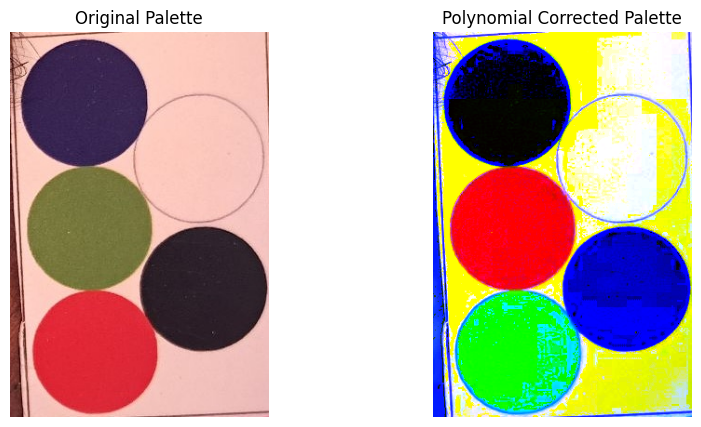

In [12]:
# Compute the polynomial transform coefficients.
coeffs = compute_polynomial_transform(meas_arr, ref_arr)
print("Polynomial Transformation Coefficients (shape: {}):".format(coeffs.shape))
print(coeffs)

# To apply the transform to an image (e.g., palette_img), first ensure it's in float32.
palette_img_float = palette_img.astype(np.float32)
corrected_img_poly = apply_polynomial_transform(palette_img_float, coeffs)

# Display the results.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img_poly, cv2.COLOR_BGR2RGB))
plt.title("Polynomial Corrected Palette")
plt.axis("off")
plt.show()


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_color_transform(image, transform_matrix):
    """
    Apply a color transformation matrix to an image.
    
    Parameters:
      image: Input image as a numpy array of shape (h, w, 3).
      transform_matrix: A numpy array of shape (3, 3) for a linear transform,
                        or shape (3, 4) for an affine transform (with offset).
                        
    Returns:
      corrected_img: The color-transformed image.
    """
    h, w, c = image.shape
    pixels = image.reshape((-1, 3)).astype(np.float32)
    
    if transform_matrix.shape == (3, 3):
        # For a 3x3 matrix, simply multiply each pixel vector.
        corrected_pixels = np.dot(pixels, transform_matrix.T)
    elif transform_matrix.shape == (3, 4):
        # For a 3x4 affine transform, extend each pixel with an extra 1.
        ones = np.ones((pixels.shape[0], 1), dtype=np.float32)
        pixels_extended = np.hstack([pixels, ones])
        corrected_pixels = np.dot(pixels_extended, transform_matrix.T)
    else:
        raise ValueError("Transform matrix must be of shape (3,3) or (3,4).")
    
    # Clamp values to valid range and reshape back to image shape.
    corrected_pixels = np.clip(corrected_pixels, 0, 255)
    corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)
    return corrected_img


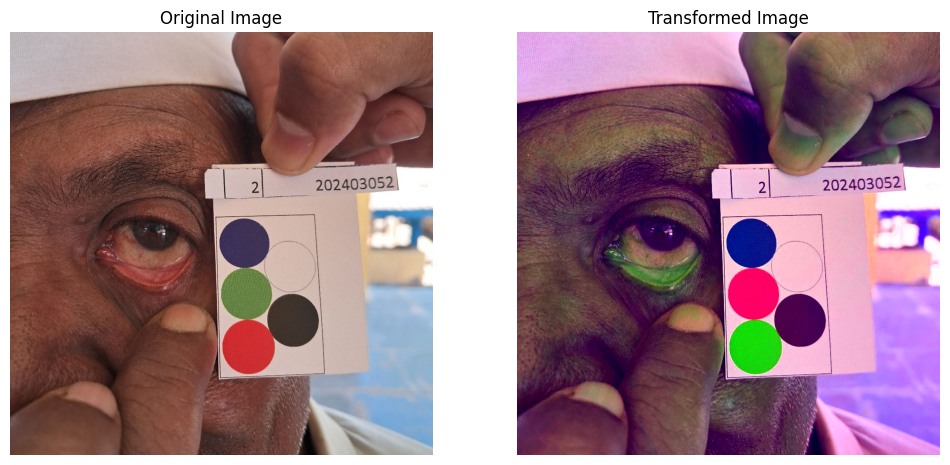

In [14]:
# -----------------------
# Example Usage:
# -----------------------

# Load an example image (replace 'input.jpg' with your image file)
input_img = cv2.imread("../Dataset Used/Left Eye_files/Images_left_eye/1709617782204.jpg")
if input_img is None:
    raise IOError("Error loading the input image.")

# Choose one of the matrices to apply:
transform_matrix = M_affine  # or M_linear

# Apply the transform to the input image.
corrected_img = apply_color_transform(input_img, transform_matrix)

# Display the original and corrected images side by side.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.axis("off")
plt.show()
